In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("Procurement KPI Analysis Dataset.csv")

# Show the first few rows
df.head()


,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
0,PO-00001,Alpha_Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,NaN,Yes
1,PO-00002,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235.0,Yes
2,PO-00003,Gamma_Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,92.26,41.0,Yes
3,PO-00004,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,95.52,112.0,Yes
4,PO-00005,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171.0,No


In [4]:
# Number of rows and columns
df.shape




(777, 11)

In [5]:
# Data types of each column
df.dtypes



,0
PO_ID,object
Supplier,object
Order_Date,object
Delivery_Date,object
Item_Category,object
Order_Status,object
Quantity,int64
Unit_Price,float64
Negotiated_Price,float64
Defective_Units,float64


In [6]:
# Column names
df.columns

Index(['PO_ID', 'Supplier', 'Order_Date', 'Delivery_Date', 'Item_Category',
       'Order_Status', 'Quantity', 'Unit_Price', 'Negotiated_Price',
       'Defective_Units', 'Compliance'],
      dtype='object')

In [7]:
# convert the Order_Date and Delivery_Date to datetime format:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'], errors='coerce')


Check for unique IDs (useful for grouping later):

In [8]:
print("Unique PO_IDs:", df['PO_ID'].nunique())


Unique PO_IDs: 777


In [9]:
df.nunique()


,0
PO_ID,777
Supplier,5
Order_Date,476
Delivery_Date,449
Item_Category,5
Order_Status,4
Quantity,623
Unit_Price,747
Negotiated_Price,752
Defective_Units,202


 Classify column types manually (after fixing dates):

In [10]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
datetime_cols = df.select_dtypes(include='datetime').columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)
print("Datetime Columns:", datetime_cols)


Categorical Columns: ['PO_ID', 'Supplier', 'Item_Category', 'Order_Status', 'Compliance']
Numerical Columns: ['Quantity', 'Unit_Price', 'Negotiated_Price', 'Defective_Units']
Datetime Columns: ['Order_Date', 'Delivery_Date']


find how many missing values exist in each column:

In [11]:
df.isnull().sum()


,0
PO_ID,0
Supplier,0
Order_Date,0
Delivery_Date,87
Item_Category,0
Order_Status,0
Quantity,0
Unit_Price,0
Negotiated_Price,0
Defective_Units,136


In [ ]:
# # Fill missing numeric values with median
# df['Defective_Units'].fillna(df['Defective_Units'].median(), inplace=True)


In [ ]:
# df.dropna(inplace=True)


In [ ]:
# df.duplicated().sum()
# df.drop_duplicates(inplace=True)


In [ ]:
# # Check unique values in 'Compliance' and 'Order_Status'
# print("Compliance:", df['Compliance'].unique())
# print("Order Status:", df['Order_Status'].unique())


# df['Compliance'] = df['Compliance'].str.strip().str.lower()
# df['Order_Status'] = df['Order_Status'].str.strip().str.title()


Fill Defective_Units missing with median:

In [12]:
df['Defective_Units'].fillna(df['Defective_Units'].median(), inplace=True)


<ipython-input-12-72b4ac0b7629>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Defective_Units'].fillna(df['Defective_Units'].median(), inplace=True)


Drop rows where Delivery_Date is missing:

In [13]:
df.dropna(subset=['Delivery_Date'], inplace=True)
# drop where delivery time is missing

verify that no missing values remain:

In [14]:
df.isnull().sum()


,0
PO_ID,0
Supplier,0
Order_Date,0
Delivery_Date,0
Item_Category,0
Order_Status,0
Quantity,0
Unit_Price,0
Negotiated_Price,0
Defective_Units,0


 Check existing unique values

In [15]:
print("Supplier:", df['Supplier'].unique())
print("Item_Category:", df['Item_Category'].unique())
print("Order_Status:", df['Order_Status'].unique())
print("Compliance:", df['Compliance'].unique())


Supplier: ['Alpha_Inc' 'Delta_Logistics' 'Gamma_Co' 'Beta_Supplies' 'Epsilon_Group']
Item_Category: ['Office Supplies' 'MRO' 'Packaging' 'Raw Materials' 'Electronics']
Order_Status: ['Cancelled' 'Delivered' 'Partially Delivered' 'Pending']
Compliance: ['Yes' 'No']


Use .str.strip() to remove whitespace and .str.lower() / .str.title() to fix case:

In [16]:
df['Supplier'] = df['Supplier'].str.strip().str.title()
df['Item_Category'] = df['Item_Category'].str.strip().str.title()
df['Order_Status'] = df['Order_Status'].str.strip().str.title()
df['Compliance'] = df['Compliance'].str.strip().str.lower()
# Use .str.strip() to remove whitespace and .str.lower() / .str.title() to fix case:

In [17]:
print("Cleaned Compliance:", df['Compliance'].unique())
print("Cleaned Order Status:", df['Order_Status'].unique())


Cleaned Compliance: ['yes' 'no']
Cleaned Order Status: ['Cancelled' 'Delivered' 'Partially Delivered' 'Pending']


In [18]:
# Summary statistics
df.describe()


,Order_Date,Delivery_Date,Quantity,Unit_Price,Negotiated_Price,Defective_Units
count,690,690,690.000000,690.000000,690.000000,690.000000
mean,2023-01-01 08:37:33.913043456,2023-01-12 03:16:10.434782720,1099.543478,58.372203,53.774406,71.294203
min,2022-01-01 00:00:00,2022-01-06 00:00:00,51.000000,10.840000,9.270000,0.000000
25%,2022-07-07 00:00:00,2022-07-19 18:00:00,627.750000,33.300000,30.465000,30.000000
50%,2023-01-04 12:00:00,2023-01-19 12:00:00,1093.000000,58.650000,53.400000,49.000000
75%,2023-07-07 00:00:00,2023-07-18 00:00:00,1546.000000,83.380000,77.000000,87.000000
max,2024-01-01 00:00:00,2024-01-12 00:00:00,5000.000000,109.170000,107.390000,321.000000
std,NaN,NaN,637.857835,28.250032,26.240467,63.666417


For numerical columns

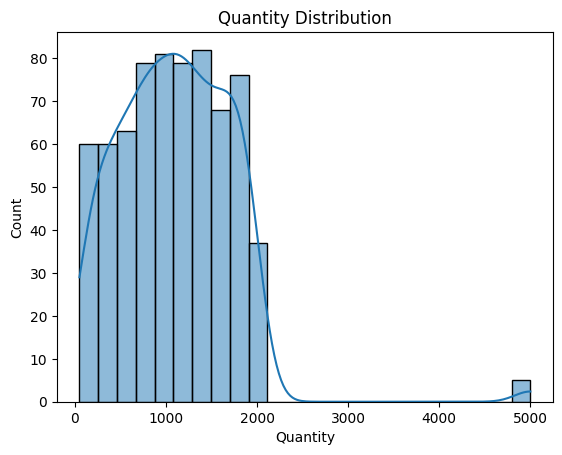

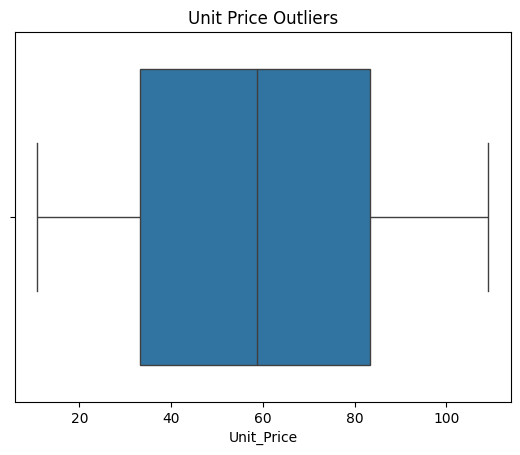

In [19]:
# for each numerical column
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram + KDE for Quantity
sns.histplot(df['Quantity'], kde=True)
plt.title('Quantity Distribution')
plt.show()

# Boxplot for Unit Price (check outliers)
sns.boxplot(x=df['Unit_Price'])
plt.title('Unit Price Outliers')
plt.show()


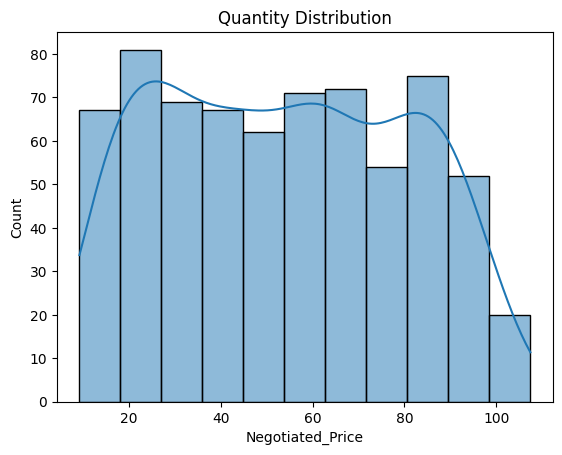

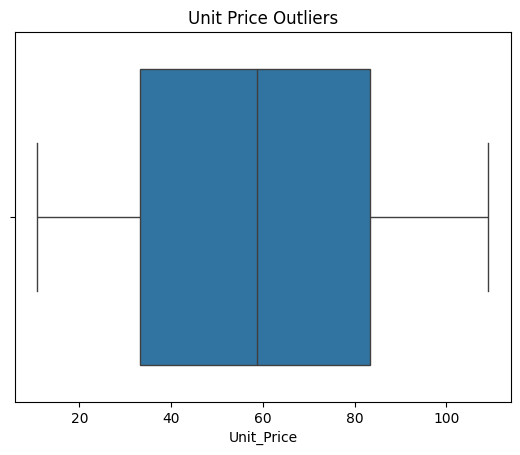

In [20]:
# for each numerical column
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram + KDE for Quantity
sns.histplot(df['Negotiated_Price'], kde=True)
plt.title('Quantity Distribution')
plt.show()

# Boxplot for Unit Price (check outliers)
sns.boxplot(x=df['Unit_Price'])
plt.title('Unit Price Outliers')
plt.show()


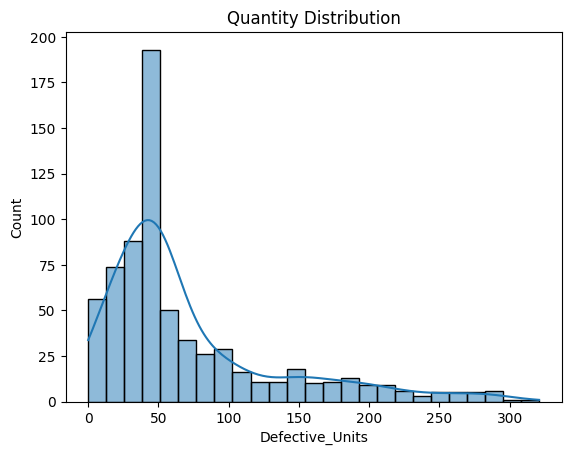

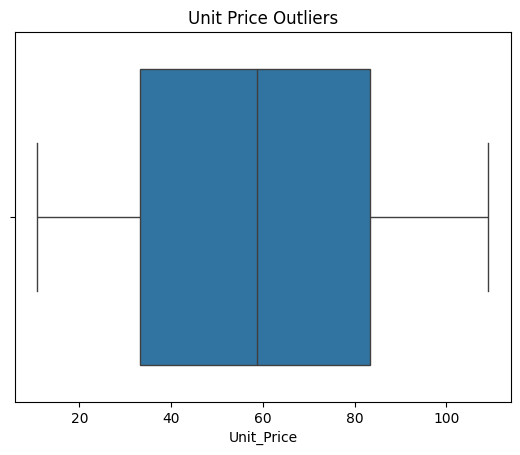

In [21]:
# for each numerical column
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram + KDE for Quantity
sns.histplot(df['Defective_Units'], kde=True)
plt.title('Quantity Distribution')
plt.show()

# Boxplot for Unit Price (check outliers)
sns.boxplot(x=df['Unit_Price'])
plt.title('Unit Price Outliers')
plt.show()


THE FIX

In [27]:
import numpy as np

# Apply log(1 + x) transformation
df['Quantity_log'] = np.log1p(df['Quantity'])
df['Defective_Units_log'] = np.log1p(df['Defective_Units'])

# Optional: Flag high defect orders
df['High_Defect'] = (df['Defective_Units'] > 200).astype(int)


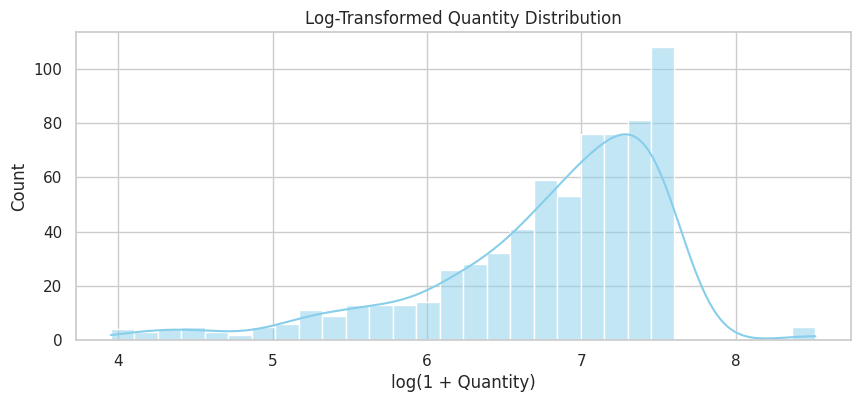

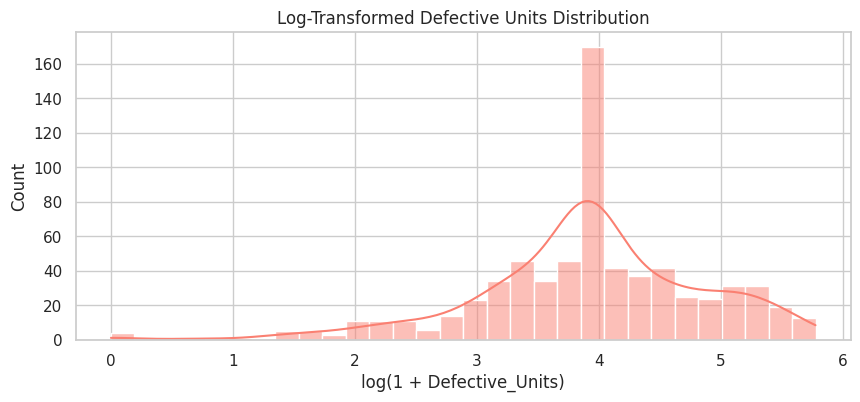

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot transformed Quantity
plt.figure(figsize=(10, 4))
sns.histplot(df['Quantity_log'], kde=True, color='skyblue', bins=30)
plt.title("Log-Transformed Quantity Distribution")
plt.xlabel("log(1 + Quantity)")
plt.ylabel("Count")
plt.show()

# Plot transformed Defective Units
plt.figure(figsize=(10, 4))
sns.histplot(df['Defective_Units_log'], kde=True, color='salmon', bins=30)
plt.title("Log-Transformed Defective Units Distribution")
plt.xlabel("log(1 + Defective_Units)")
plt.ylabel("Count")
plt.show()


For categorical columns


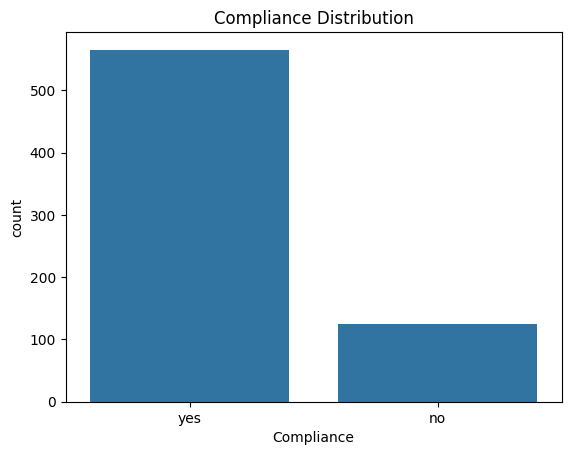

In [22]:
# for each categorical column
# Frequency table
df['Compliance'].value_counts()

# Bar plot
sns.countplot(data=df, x='Compliance')
plt.title('Compliance Distribution')
plt.show()


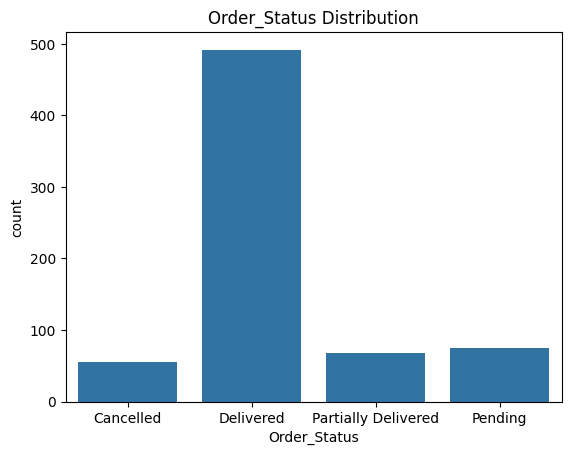

In [24]:
# for each categorical column
# Frequency table
df['Order_Status'].value_counts()

# Bar plot
sns.countplot(data=df, x='Order_Status')
plt.title('Order_Status Distribution')
plt.show()


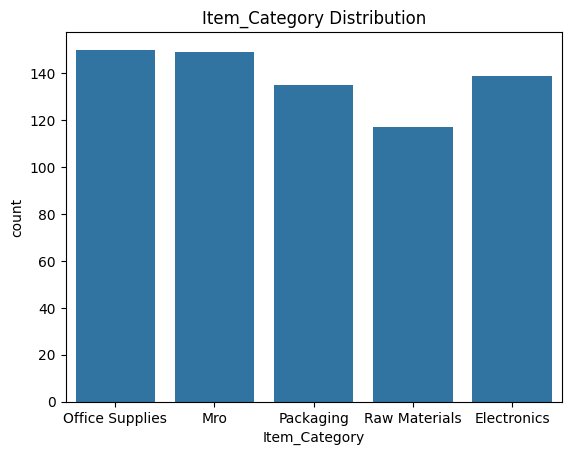

In [25]:
# for each categorical column
# Frequency table
df['Item_Category'].value_counts()

# Bar plot
sns.countplot(data=df, x='Item_Category')
plt.title('Item_Category Distribution')
plt.show()


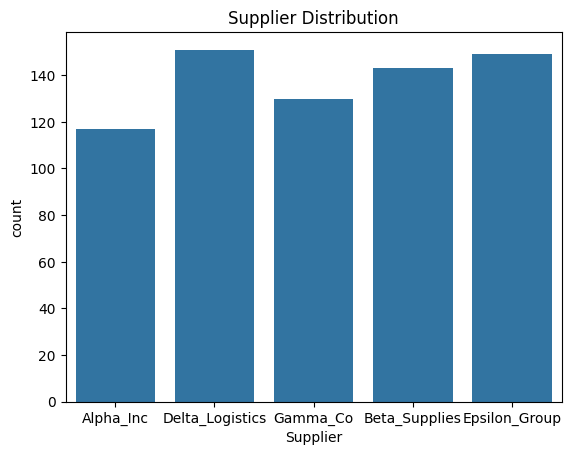

In [26]:
# for each categorical column
# Frequency table
df['Supplier'].value_counts()

# Bar plot
sns.countplot(data=df, x='Supplier')
plt.title('Supplier Distribution')
plt.show()


The fix

In [29]:
# Example encodings
df['Compliance_Binary'] = df['Compliance'].map({'yes': 1, 'no': 0})  # Optional

# If you prefer one-hot encoding for modeling:
df = pd.get_dummies(df, columns=['Order_Status', 'Item_Category', 'Supplier'], drop_first=True)


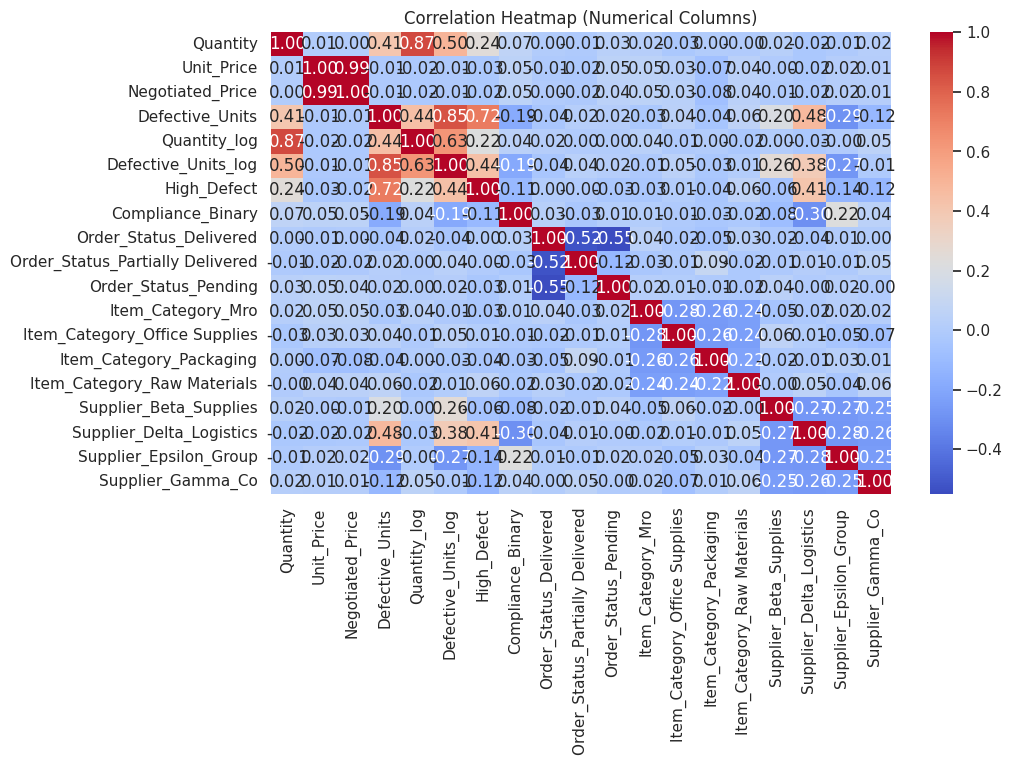

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Columns)")
plt.show()


In [36]:
df.columns = df.columns.str.strip()


In [38]:
print(df.columns.tolist())


['PO_ID', 'Order_Date', 'Delivery_Date', 'Quantity', 'Unit_Price', 'Negotiated_Price', 'Defective_Units', 'Compliance', 'Quantity_log', 'Defective_Units_log', 'High_Defect', 'Compliance_Binary', 'Order_Status_Delivered', 'Order_Status_Partially Delivered', 'Order_Status_Pending', 'Item_Category_Mro', 'Item_Category_Office Supplies', 'Item_Category_Packaging', 'Item_Category_Raw Materials', 'Supplier_Beta_Supplies', 'Supplier_Delta_Logistics', 'Supplier_Epsilon_Group', 'Supplier_Gamma_Co']


modeling


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Step 1: Binary encode the target
df['Compliance'] = df['Compliance'].map({'yes': 1, 'no': 0})

# Step 2: Feature Engineering
df['Delivery_Duration'] = (df['Delivery_Date'] - df['Order_Date']).dt.days
df['Order_Month'] = df['Order_Date'].dt.month
df['Order_Weekday'] = df['Order_Date'].dt.weekday
df['Delivery_Month'] = df['Delivery_Date'].dt.month
df['Delivery_Weekday'] = df['Delivery_Date'].dt.weekday

# Step 3: Define columns
num_features = ['Quantity', 'Unit_Price', 'Negotiated_Price', 'Defective_Units', 'Delivery_Duration']
cat_features = ['Supplier', 'Order_Status', 'Item_Category', 'Order_Month', 'Order_Weekday', 'Delivery_Month', 'Delivery_Weekday']

# Step 4: Split data
X = df[num_features + cat_features]
y = df['Compliance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Pipeline
clf = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))

# Cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation Accuracy:", np.mean(cv_scores))

# Final Fit
clf.fit(X_train, y_train)

# Evaluate
print("Test Accuracy:", clf.score(X_test, y_test))


In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Example: remove outliers in Quantity
df_clean_iqr = remove_outliers_iqr(df, 'Quantity')


In [ ]:
from scipy.stats import zscore

def remove_outliers_zscore(df, column, threshold=3):
    z_scores = zscore(df[column])
    return df[(abs(z_scores) < threshold)]

# Example: remove outliers in Defective_Units
df_clean_z = remove_outliers_zscore(df, 'Defective_Units')


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize multiple numerical columns
scaler = MinMaxScaler()
columns_to_scale = ['Quantity', 'Unit_Price', 'Negotiated_Price', 'Defective_Units']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# All values are now scaled between 0 and 1


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical columns
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Values are now centered (mean = 0, std = 1)
